# Machine Learning

---

This notebook is for the machine learning of our dataset.

Here is our problem definition:

> (1) To predict if a customer will have a claim on their insurance policy.         
> (2) To predict the claim cost for customers with claim(s).
---

### Preparation

First, we will import the necessary libraries that will be used in this notebook


In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

---
The cleaned data is imported as a DataFrame named `data`.



In [395]:
data = pd.read_csv("Prepped.csv")
data.head()

,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,month,year,monthDiff
0,12/30/2020,F,4.0,7/12/1968,4.265979,D,65.811441,34.0,HBACK,1.331,0,0.0,12.0,2020.0,40.0
1,12/30/2020,F,2.0,11/5/1982,38.558763,D,81.542373,1.0,UTE,3.740,0,0.0,12.0,2020.0,40.0
2,12/30/2020,M,2.0,11/26/1983,58.971134,B,57.369174,100.0,COUPE,0.880,0,0.0,12.0,2020.0,40.0
3,12/30/2020,M,4.0,11/2/1960,78.158763,B,48.559852,67.0,SEDAN,1.045,0,0.0,12.0,2020.0,40.0
4,12/30/2020,F,4.0,1/4/1968,93.263918,C,56.320445,100.0,HBACK,0.473,0,0.0,12.0,2020.0,40.0


In [273]:
# binary classification predicting if there will be a claim

In [274]:
# shift to data prep notebook

for i, row in data.iterrows():
    if row["numclaims"] == 0:
        data._set_value(i, "claims", "No")
    else:
        data._set_value(i, "claims", "Yes")

In [275]:
data

,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,month,year,monthDiff,claims
0,12/30/2020,F,4.0,7/12/1968,4.265979,D,65.811441,34.0,HBACK,1.331,0,0.0,12.0,2020.0,40.0,No
1,12/30/2020,F,2.0,11/5/1982,38.558763,D,81.542373,1.0,UTE,3.740,0,0.0,12.0,2020.0,40.0,No
2,12/30/2020,M,2.0,11/26/1983,58.971134,B,57.369174,100.0,COUPE,0.880,0,0.0,12.0,2020.0,40.0,No
3,12/30/2020,M,4.0,11/2/1960,78.158763,B,48.559852,67.0,SEDAN,1.045,0,0.0,12.0,2020.0,40.0,No
4,12/30/2020,F,4.0,1/4/1968,93.263918,C,56.320445,100.0,HBACK,0.473,0,0.0,12.0,2020.0,40.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54130,1/2/2020,F,3.0,8/2/1977,80.608247,E,13.846928,100.0,UTE,2.310,0,0.0,1.0,2020.0,39.0,No
54131,1/2/2020,F,5.0,5/10/1956,91.630928,C,72.051377,100.0,HBACK,0.891,0,0.0,1.0,2020.0,39.0,No
54132,1/2/2020,M,4.0,3/22/1961,65.503093,D,41.009004,1.0,HBACK,1.881,0,0.0,1.0,2020.0,39.0,No
54133,1/2/2020,M,3.0,8/1/1978,72.239175,B,52.545021,1.0,HBACK,1.903,0,0.0,1.0,2020.0,39.0,No


---
For our first problem, we will be using Binary Classification techniques to predict if a claim will be raised by a customer.

Response variable: `claims`

Before we perform classification, we will use `OneHotEncoding` to convert the categorical data to numerical data.

In [276]:
ohe = OneHotEncoder()

data_cat = data[["gender", "agecat", "area", "veh_body"]]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(),
                           columns = ohe.get_feature_names_out(data_cat.columns))
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54135 entries, 0 to 54134
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender_F        54135 non-null  float64
 1   gender_M        54135 non-null  float64
 2   agecat_1.0      54135 non-null  float64
 3   agecat_2.0      54135 non-null  float64
 4   agecat_3.0      54135 non-null  float64
 5   agecat_4.0      54135 non-null  float64
 6   agecat_5.0      54135 non-null  float64
 7   agecat_6.0      54135 non-null  float64
 8   area_A          54135 non-null  float64
 9   area_B          54135 non-null  float64
 10  area_C          54135 non-null  float64
 11  area_D          54135 non-null  float64
 12  area_E          54135 non-null  float64
 13  area_F          54135 non-null  float64
 14  veh_body_BUS    54135 non-null  float64
 15  veh_body_CONVT  54135 non-null  float64
 16  veh_body_COUPE  54135 non-null  float64
 17  veh_body_HBACK  54135 non-null 

In [277]:
data_num = data[["credit_score", "traffic_index", "veh_age"]]
data_res = data["claims"]
dataOHE = pd.concat([data_cat_ohe, data_num, data_res],
                   sort = False, axis = 1).reindex(index = data_num.index)

dataOHE.head()

,gender_F,gender_M,agecat_1.0,agecat_2.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,area_A,area_B,...,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE,credit_score,traffic_index,veh_age,claims
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.265979,65.811441,34.0,No
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,38.558763,81.542373,1.0,No
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,58.971134,57.369174,100.0,No
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,78.158763,48.559852,67.0,No
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93.263918,56.320445,100.0,No


There is also huge data imbalance for the response `claims`, as visualised below. As such, we need to upsample the "Yes" to match with "No"

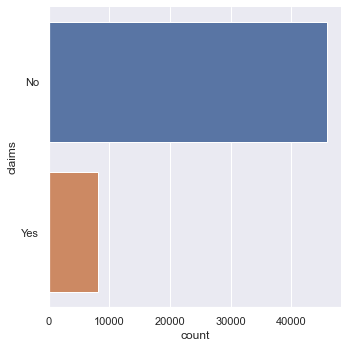

In [278]:
sb.catplot(y = "claims", data = dataOHE, kind = "count")

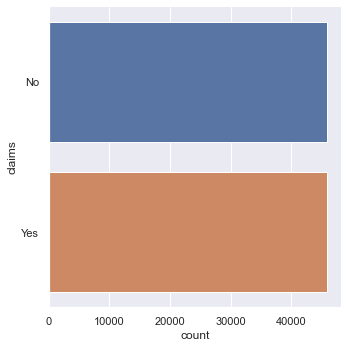

In [279]:
claimsNo = dataOHE[dataOHE.claims == "No"]
claimsYes = dataOHE[dataOHE.claims == "Yes"]

claimsYes_up = resample(claimsYes,
                      replace = True,
                      n_samples = claimsNo.shape[0])

dataOHE_up = pd.concat([claimsNo, claimsYes_up])

sb.catplot(y = "claims", data = dataOHE_up, kind = "count")

In [339]:
dataOHE_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91926 entries, 0 to 28507
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender_F        91926 non-null  float64
 1   gender_M        91926 non-null  float64
 2   agecat_1.0      91926 non-null  float64
 3   agecat_2.0      91926 non-null  float64
 4   agecat_3.0      91926 non-null  float64
 5   agecat_4.0      91926 non-null  float64
 6   agecat_5.0      91926 non-null  float64
 7   agecat_6.0      91926 non-null  float64
 8   area_A          91926 non-null  float64
 9   area_B          91926 non-null  float64
 10  area_C          91926 non-null  float64
 11  area_D          91926 non-null  float64
 12  area_E          91926 non-null  float64
 13  area_F          91926 non-null  float64
 14  veh_body_BUS    91926 non-null  float64
 15  veh_body_CONVT  91926 non-null  float64
 16  veh_body_COUPE  91926 non-null  float64
 17  veh_body_HBACK  91926 non-null 

Now, we will perform `LogisticRegression` to predict the response `claims`.

We will split the dataset into train and test dataset, with test size being 30%.

In [280]:
y = pd.DataFrame(dataOHE_up["claims"])
x = pd.DataFrame(dataOHE_up.drop("claims", axis = 1))

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

logreg = LogisticRegression(max_iter = 400)

logreg.fit(xTrain, yTrain.claims.ravel())

/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400)

Train data
Accuracy :	 0.7329520731025051

TPR :	 0.7322389080620589
TNR :	 0.7336647506602455

FPR :	 0.26633524933975455
FNR :	 0.2677610919379411


<AxesSubplot:>

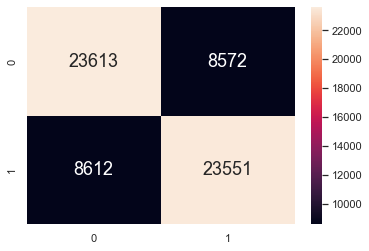

In [281]:
yTrain_pred = logreg.predict(xTrain)

print("Train data")
print("Accuracy :\t", logreg.score(xTrain, yTrain))
print()

cmTrain = confusion_matrix(yTrain, yTrain_pred)
tnTrain = cmTrain[0][0]
fpTrain = cmTrain[0][1]
fnTrain = cmTrain[1][0]
tpTrain = cmTrain[1][1]

print("TPR :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR :\t", (tnTrain/(tnTrain + fpTrain)))
print()
print("FPR :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(cmTrain, annot = True, fmt = ".0f", annot_kws = {"size":18})

Test data
Accuracy :	 0.7347160780332149

TPR :	 0.7343478260869565
TNR :	 0.7350849179851938

FPR :	 0.26491508201480624
FNR :	 0.26565217391304347


<AxesSubplot:>

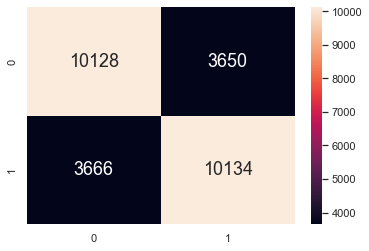

In [282]:
yTest_pred = logreg.predict(xTest)

print("Test data")
print("Accuracy :\t", logreg.score(xTest, yTest))
print()

cmTest = confusion_matrix(yTest, yTest_pred)
tnTest = cmTest[0][0]
fpTest = cmTest[0][1]
fnTest = cmTest[1][0]
tpTest = cmTest[1][1]

print("TPR :\t", (tpTest/(tpTest + fnTest)))
print("TNR :\t", (tnTest/(tnTest + fpTest)))
print()
print("FPR :\t", (fpTest/(fpTest + tnTest)))
print("FNR :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(cmTest, annot = True, fmt = ".0f", annot_kws = {"size":18})

A confusion matrix is plotted, with the accuracy metrics printed for the machine learning model.

---

`GridSearchCV` is used to find the best parameters to use for `LogisticRegression`

In [283]:
y = pd.DataFrame(dataOHE_up["claims"])
x = pd.DataFrame(dataOHE_up.drop("claims", axis = 1))

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver = solver_list)
log_reg = LogisticRegression(C = 1, n_jobs = -1, random_state = 34)
clf = GridSearchCV(log_reg, params, cv = 5)
clf.fit(xTrain, yTrain)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"{solver}:\t\t {score:.3f}" )


/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn

/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packa

liblinear:		 0.734
newton-cg:		 0.734
lbfgs:		 0.733
sag:		 0.734
saga:		 0.734


/Users/limjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


From `GridSearchCV` results, each solver for `LogisticRegression` yields the same result.

---

Next, we will try a new machine learning model to predict the response.
`RandomForestRegression` will be used.

In [284]:
y = pd.DataFrame(dataOHE_up["claims"])
x = pd.DataFrame(dataOHE_up.drop("claims", axis = 1))

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

rforest = RandomForestClassifier(n_estimators = 100,
                                 max_depth = 10)

rforest.fit(xTrain, yTrain.claims.ravel())

RandomForestClassifier(max_depth=10)

Train data
Accuracy :	 0.7683222477777087

TPR :	 0.7742746314972847
TNR :	 0.7623509634841079

FPR :	 0.23764903651589203
FNR :	 0.2257253685027153


<AxesSubplot:>

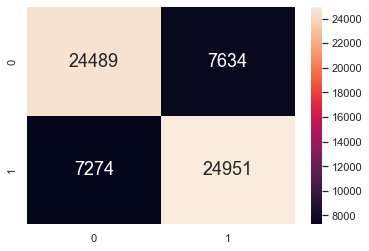

In [285]:
yTrain_pred = rforest.predict(xTrain)

print("Train data")
print("Accuracy :\t", rforest.score(xTrain, yTrain))
print()

cmTrain = confusion_matrix(yTrain, yTrain_pred)
tnTrain = cmTrain[0][0]
fpTrain = cmTrain[0][1]
fnTrain = cmTrain[1][0]
tpTrain = cmTrain[1][1]

print("TPR :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR :\t", (tnTrain/(tnTrain + fpTrain)))
print()
print("FPR :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(cmTrain, annot = True, fmt = ".0f", annot_kws = {"size":18})

Test data
Accuracy :	 0.7625643628979621

TPR :	 0.7655408356383753
TNR :	 0.7596098265895954

FPR :	 0.2403901734104046
FNR :	 0.2344591643616247


<AxesSubplot:>

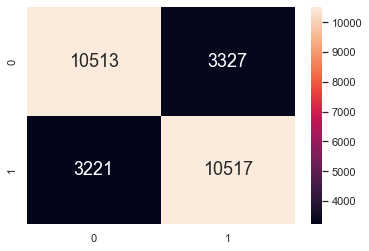

In [286]:
yTest_pred = rforest.predict(xTest)

print("Test data")
print("Accuracy :\t", rforest.score(xTest, yTest))
print()

cmTest = confusion_matrix(yTest, yTest_pred)
tnTest = cmTest[0][0]
fpTest = cmTest[0][1]
fnTest = cmTest[1][0]
tpTest = cmTest[1][1]

print("TPR :\t", (tpTest/(tpTest + fnTest)))
print("TNR :\t", (tnTest/(tnTest + fpTest)))
print()
print("FPR :\t", (fpTest/(fpTest + tnTest)))
print("FNR :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(cmTest, annot = True, fmt = ".0f", annot_kws = {"size":18})

In [287]:
# y = pd.DataFrame(dataOHE_up["claims"])
# x = pd.DataFrame(dataOHE_up.drop("claims", axis = 1))

# xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

# param_grid = {'n_estimators': np.arange(100,1001,100),   
#               'max_depth': np.arange(2, 11)}             

# hpGrid = GridSearchCV(RandomForestClassifier(),   
#                       param_grid,                 
#                       cv = 5,                     
#                       scoring = 'accuracy')       

# hpGrid.fit(xTrain, yTrain.claims.ravel())
# print(hpGrid.best_estimator_)
# print(np.abs(hpGrid.best_score_))

In [423]:
#linear regression

For the second problem, we will be using regression techniques to predict the claim cost.

Before that, we will have to filter out only those rows where there is a claim.

In [309]:
data2 = data[data.numclaims > 0]
data2

,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,month,year,monthDiff,claims
14,12/30/2020,M,5.0,8/7/1957,45.703093,C,50.814619,67.0,SEDAN,1.5290,1,1120.833360,12.0,2020.0,40.0,Yes
17,12/30/2020,M,3.0,4/25/1977,7.327835,E,9.127648,100.0,UTE,1.6500,2,4548.075015,12.0,2020.0,40.0,Yes
24,12/30/2020,M,2.0,2/13/1985,65.707216,D,42.005297,67.0,TRUCK,3.3440,1,4657.070661,12.0,2020.0,40.0,Yes
27,12/30/2020,F,2.0,4/11/1980,14.472165,C,53.960805,1.0,HBACK,2.4178,3,6616.971570,12.0,2020.0,40.0,Yes
32,12/30/2020,F,3.0,12/28/1953,47.540206,D,52.964513,1.0,SEDAN,2.7500,1,4442.096621,12.0,2020.0,40.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54093,1/2/2020,M,4.0,9/20/1968,16.921649,C,51.601165,100.0,HBACK,0.9350,1,804.425046,1.0,2020.0,39.0,Yes
54101,1/2/2020,F,3.0,2/8/1977,65.707216,B,50.395127,100.0,SEDAN,1.1550,1,408.363278,1.0,2020.0,39.0,Yes
54116,1/2/2020,M,4.0,3/13/1968,45.294845,C,64.972458,100.0,SEDAN,0.3850,1,490.897473,1.0,2020.0,39.0,Yes
54117,1/2/2020,M,1.0,4/19/1994,51.010309,A,35.817797,67.0,HBACK,1.1220,1,402.791766,1.0,2020.0,39.0,Yes


In [312]:
data2.drop(columns = ["pol_eff_dt", "date_of_birth", "claimcst0", "month", "year", "claims"])

,gender,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,monthDiff
14,M,5.0,45.703093,C,50.814619,67.0,SEDAN,1.5290,1,40.0
17,M,3.0,7.327835,E,9.127648,100.0,UTE,1.6500,2,40.0
24,M,2.0,65.707216,D,42.005297,67.0,TRUCK,3.3440,1,40.0
27,F,2.0,14.472165,C,53.960805,1.0,HBACK,2.4178,3,40.0
32,F,3.0,47.540206,D,52.964513,1.0,SEDAN,2.7500,1,40.0
...,...,...,...,...,...,...,...,...,...,...
54093,M,4.0,16.921649,C,51.601165,100.0,HBACK,0.9350,1,39.0
54101,F,3.0,65.707216,B,50.395127,100.0,SEDAN,1.1550,1,39.0
54116,M,4.0,45.294845,C,64.972458,100.0,SEDAN,0.3850,1,39.0
54117,M,1.0,51.010309,A,35.817797,67.0,HBACK,1.1220,1,39.0


In [422]:
data_lin = data2.copy()
data_lin.drop(["pol_eff_dt", "date_of_birth", "month", "year", "monthDiff"], axis = 1)

,gender,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,claims
14,M,5.0,45.703093,C,50.814619,67.0,SEDAN,1.5290,1,1120.833360,Yes
17,M,3.0,7.327835,E,9.127648,100.0,UTE,1.6500,2,4548.075015,Yes
24,M,2.0,65.707216,D,42.005297,67.0,TRUCK,3.3440,1,4657.070661,Yes
27,F,2.0,14.472165,C,53.960805,1.0,HBACK,2.4178,3,6616.971570,Yes
32,F,3.0,47.540206,D,52.964513,1.0,SEDAN,2.7500,1,4442.096621,Yes
...,...,...,...,...,...,...,...,...,...,...,...
54093,M,4.0,16.921649,C,51.601165,100.0,HBACK,0.9350,1,804.425046,Yes
54101,F,3.0,65.707216,B,50.395127,100.0,SEDAN,1.1550,1,408.363278,Yes
54116,M,4.0,45.294845,C,64.972458,100.0,SEDAN,0.3850,1,490.897473,Yes
54117,M,1.0,51.010309,A,35.817797,67.0,HBACK,1.1220,1,402.791766,Yes


---

Similarly, we have to convert the categorical data to numerical.

This time, we used `DummyEncoding`.

The data is also split into train and test set, with test size being 30%.

We will be performing `LinearRegression`

In [436]:
# x = data[["gender", "agecat", "area", "veh_body", "credit_score", "traffic_index", "veh_age", "veh_body", "numclaims"]]
# x = pd.get_dummies(data = x, drop_first = True)
x = pd.DataFrame(data_lin.drop(["claimcst0"], axis = 1))
x = pd.get_dummies(data = x, drop_first = True)
y = pd.DataFrame(data_lin["claimcst0"])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

linreg = LinearRegression()
linreg.fit(xTrain, yTrain)

LinearRegression()

In [437]:
yTrain_pred = linreg.predict(xTrain)
yTest_pred = linreg.predict(xTest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(xTrain, yTrain))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTrain, yTrain_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(xTest, yTest))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTest, yTest_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9715623162221501
Mean Squared Error (MSE) 	: 967179.9051028119

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -9.842234758941654e+17
Mean Squared Error (MSE) 	: 2.6634073222959267e+25



In [438]:
x = pd.DataFrame(data_lin.drop(["claimcst0", "veh_value"], axis = 1))
x = pd.get_dummies(data = x, drop_first = True)
y = pd.DataFrame(data_lin["claimcst0"])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

linreg = LinearRegression()
linreg.fit(xTrain, yTrain)

LinearRegression()

In [439]:
yTrain_pred = linreg.predict(xTrain)
yTest_pred = linreg.predict(xTest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(xTrain, yTrain))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTrain, yTrain_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(xTest, yTest))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTest, yTest_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9731026119802697
Mean Squared Error (MSE) 	: 838628.8477831443

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -1.01833216655943e+16
Mean Squared Error (MSE) 	: 3.4304955532653414e+23



In [449]:
x = pd.DataFrame(data_lin.drop(["claimcst0", "veh_value", "veh_age"], axis = 1))
x = pd.get_dummies(data = x, drop_first = True)
y = pd.DataFrame(data_lin["claimcst0"])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

linreg = LinearRegression()
linreg.fit(xTrain, yTrain)

LinearRegression()

In [441]:
yTrain_pred = linreg.predict(xTrain)
yTest_pred = linreg.predict(xTest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(xTrain, yTrain))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTrain, yTrain_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(xTest, yTest))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTest, yTest_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9763423455714868
Mean Squared Error (MSE) 	: 715254.6780586382

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.6898495142629417
Mean Squared Error (MSE) 	: 60649412.78321482



In [460]:
x = pd.DataFrame(data_lin.drop(["claimcst0", "veh_value", "veh_age", "gender"], axis = 1))
x = pd.get_dummies(data = x, drop_first = True)
y = pd.DataFrame(data_lin["claimcst0"])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

linreg = LinearRegression()
linreg.fit(xTrain, yTrain)

LinearRegression()

In [461]:
yTrain_pred = linreg.predict(xTrain)
yTest_pred = linreg.predict(xTest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(xTrain, yTrain))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTrain, yTrain_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(xTest, yTest))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTest, yTest_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9704139753700755
Mean Squared Error (MSE) 	: 934884.1760800723

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.5223956880081411
Mean Squared Error (MSE) 	: 49792533.48301083



Lastly, we perform `RidgeRegression`

In [520]:
x = pd.DataFrame(data_lin.drop(["claimcst0", "veh_value", "gender"], axis = 1))
x = pd.get_dummies(data = x, drop_first = True)
y = pd.DataFrame(data_lin["claimcst0"])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

ridgereg = Ridge(alpha = 5)

ridgereg.fit(xTrain, yTrain)

Ridge(alpha=5)

In [521]:
yTrain_pred = ridgereg.predict(xTrain)
yTest_pred = ridgereg.predict(xTest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", ridgereg.score(xTrain, yTrain))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTrain, yTrain_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", ridgereg.score(xTest, yTest))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTest, yTest_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5747866440699785
Mean Squared Error (MSE) 	: 13338107.616857424

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3442336847769233
Mean Squared Error (MSE) 	: 21787827.330715105



In [564]:
x = pd.DataFrame(data_lin.drop(["claimcst0", "veh_value", "gender"], axis = 1))
x = pd.get_dummies(data = x, drop_first = True)
y = pd.DataFrame(data_lin["claimcst0"])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

ridgereg = Ridge(alpha = 3)

ridgereg.fit(xTrain, yTrain)

Ridge(alpha=3)

In [565]:
yTrain_pred = ridgereg.predict(xTrain)
yTest_pred = ridgereg.predict(xTest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", ridgereg.score(xTrain, yTrain))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTrain, yTrain_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", ridgereg.score(xTest, yTest))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTest, yTest_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6476184641868481
Mean Squared Error (MSE) 	: 11920764.76774165

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.34654418960183453
Mean Squared Error (MSE) 	: 17964317.636825893



In [598]:
x = pd.DataFrame(data_lin.drop(["claimcst0", "veh_value", "gender"], axis = 1))
x = pd.get_dummies(data = x, drop_first = True)
y = pd.DataFrame(data_lin["claimcst0"])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

ridgereg = Ridge(alpha = 1)

ridgereg.fit(xTrain, yTrain)

Ridge(alpha=1)

In [599]:
yTrain_pred = ridgereg.predict(xTrain)
yTest_pred = ridgereg.predict(xTest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", ridgereg.score(xTrain, yTrain))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTrain, yTrain_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", ridgereg.score(xTest, yTest))
print("Mean Squared Error (MSE) \t:", mean_squared_error(yTest, yTest_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8222488181791843
Mean Squared Error (MSE) 	: 5753073.318385033

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3022691998862743
Mean Squared Error (MSE) 	: 21572444.482867166

